# Importing XDF files in HyPyP
@Author : [@jonasmago](https://github.com/jonasmago) & [@FranckPrts](https://github.com/FranckPrts).

Updated by : [@patricefortin](https://github.com/patricefortin) 

Last updated: 2025/6/6

This tutorial guides you in using the `XDFImport` class provided by [HyPyP](https://github.com/ppsp-team/HyPyP/blob/master/hypyp/xdf/).

[XDF files](https://github.com/sccn/xdf) are generally produced by [LSL](https://labstreaminglayer.readthedocs.io/index.html) (Lab Streaming Layer) when recording multi-stream time-series data generated in different modalities (e.g., EEG, video, audio). This open-source format enables associating extensive meta information. It is tailored for biosignal data (e.g., EEG, EOG, ECG, MEG) but still supports high sampling rate data (e.g., audio) or high-channel data (e.g., video, fMRI).

In this tutorial, we convert 2 EEG streams from a sample XDF into 2 `mne.io.RawArray`.


## Imports & path to XDF file

In [ ]:
from hypyp.xdf import XDFImport

# This file has been generated using 2 starstim-32 and recorded by LabRecorder.
# No participant were wearing the starstim so we only have noise
path_xdf = "../data/XDF/dyad-example-noise.xdf"

# This file has been generated from synthetic noise
path_xdf_with_markers = "../data/XDF/dyad-example-with-markers.xdf"

First, we instanciate the class without doing any conversion, to inspect the content of the XDF streams: 

In [2]:
xdf = XDFImport(path_xdf, convert_to_mne=False)
print(xdf)

XDFImport with 8 available streams and 6 selected streams (loaded from ../data/XDF/dyad-example-noise.xdf)
Available streams:
  Stream id 3 of type 'Markers' with name 'LSLOutletHS1-Markers'
    Sampling Rate: 0.0
    Channel names: [Markers_001]
    Channel types: [stim]
  Stream id 1 of type 'Accelerometer' with name 'LSLOutletHS1-Accelerometer'
    Sampling Rate: 100.0
    Channel names: [X,Y,Z]
    Channel types: [misc,misc,misc]
  Stream id 8 of type 'Quality' with name 'LSLOutletHS1-Quality'
    Sampling Rate: 1.0
    Channel names: [Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Ch17,Ch18,Ch19,Ch20,Ch21,Ch22,Ch23,Ch24,Ch25,Ch26,Ch27,Ch28,Ch29,Ch30,Ch31,Ch32]
    Channel types: [quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality,quality]
  Stream id 2 of type 'EE

**Great!** Now we know what our XDF is composed of. Let's explore different ways of converting on or multiple EEG stream from it into `mne.io.RawArray` object(s).

### Two ways to use `XDFImport`

Here we look into two examples where we use `IMPORT_XDF` to convert the EEG streams into `mne.Raw`(s):
- **Situation 1:** The user wants to (blindly) **convert all** available EEG stream(s) in the XDF into `mne.Raw`(s)
- **Situation 2:** The user knows the index and/or name of one/multiple EEG stream(s) to convert

#### Situation 1
The user wants to **convert all** available EEG stream(s) in the XDF into `mne.io.RawArray`(s). This will convert all the signal streams that are compatible with MNE, and also add markers as annotations to every `mne.io.RawArray` objects

In [3]:
xdf = XDFImport(path_xdf)
xdf.mne_raws_dict

Creating RawArray with float64 data, n_channels=3, n_times=1001
    Range : 0 ... 1000 =      0.000 ...    10.000 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=5003
    Range : 0 ... 5002 =      0.000 ...    10.004 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=1001
    Range : 0 ... 1000 =      0.000 ...    10.000 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=5004
    Range : 0 ... 5003 =      0.000 ...    10.006 secs
Ready.


{'LSLOutletHS1-Accelerometer': <RawArray | 3 x 1001 (10.0 s), ~31 kB, data loaded>,
 'LSLOutletHS1-EEG': <RawArray | 32 x 5003 (10.0 s), ~1.2 MB, data loaded>,
 'LSLOutletHS2-Accelerometer': <RawArray | 3 x 1001 (10.0 s), ~31 kB, data loaded>,
 'LSLOutletHS2-EEG': <RawArray | 32 x 5004 (10.0 s), ~1.2 MB, data loaded>}

In [4]:
# A file with markers
xdf = XDFImport(path_xdf_with_markers)
print(xdf)
print(xdf.mne_raws_dict)
print(xdf.mne_raws[0].annotations)

Error reading chunk length
Traceback (most recent call last):
  File "/home/patrice/.cache/pypoetry/virtualenvs/hypyp-9w4TS9uv-py3.12/lib/python3.12/site-packages/pyxdf/pyxdf.py", line 230, in load_xdf
    chunklen = _read_varlen_int(f)
               ^^^^^^^^^^^^^^^^^^^
  File "/home/patrice/.cache/pypoetry/virtualenvs/hypyp-9w4TS9uv-py3.12/lib/python3.12/site-packages/pyxdf/pyxdf.py", line 489, in _read_varlen_int
    raise RuntimeError("invalid variable-length integer encountered.")
RuntimeError: invalid variable-length integer encountered.


Creating RawArray with float64 data, n_channels=3, n_times=6536
    Range : 0 ... 6535 =      0.000 ...     6.535 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=6538
    Range : 0 ... 6537 =      0.000 ...     6.537 secs
Ready.
XDFImport with 3 available streams and 3 selected streams (loaded from ../data/XDF/dyad-example-with-markers.xdf)
Available streams:
  Stream id 2 of type 'Markers' with name 'RandomStrStream'
    Sampling Rate: 0.0
    Channel names: [Markers_001]
    Channel types: [stim]
  Stream id 3 of type 'EEG' with name 'EEG_subject_1'
    Sampling Rate: 1000.0
    Channel names: [Ch1,Ch2,Ch3]
    Channel types: [eeg,eeg,eeg]
  Stream id 1 of type 'EEG' with name 'EEG_subject_2'
    Sampling Rate: 1000.0
    Channel names: [Ch1,Ch2,Ch3]
    Channel types: [eeg,eeg,eeg]
Selected streams: [RandomStrStream,EEG_subject_1,EEG_subject_2]

{'EEG_subject_1': <RawArray | 3 x 6536 (6.5 s), ~160 kB, data loaded>, 'EEG_subject_2': <RawArray | 3 x 6538 (6.5 s)

#### Situation 2
We know either the identifier (integers) of the EEG streams we want to convert, or we know their name. Here using both the chanel indexes and names.

In [5]:
xdf = XDFImport(path_xdf, select_matches=["LSLOutletHS1-EEG", "LSLOutletHS2-EEG"])
xdf.mne_raws_dict

Creating RawArray with float64 data, n_channels=32, n_times=5003
    Range : 0 ... 5002 =      0.000 ...    10.004 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=5004
    Range : 0 ... 5003 =      0.000 ...    10.006 secs
Ready.


{'LSLOutletHS1-EEG': <RawArray | 32 x 5003 (10.0 s), ~1.2 MB, data loaded>,
 'LSLOutletHS2-EEG': <RawArray | 32 x 5004 (10.0 s), ~1.2 MB, data loaded>}

In [6]:
xdf = XDFImport(path_xdf, select_matches=[2, 7], scale=1e-6)
xdf.mne_raws_dict

Creating RawArray with float64 data, n_channels=32, n_times=5003
    Range : 0 ... 5002 =      0.000 ...    10.004 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=5004
    Range : 0 ... 5003 =      0.000 ...    10.006 secs
Ready.


{'LSLOutletHS1-EEG': <RawArray | 32 x 5003 (10.0 s), ~1.2 MB, data loaded>,
 'LSLOutletHS2-EEG': <RawArray | 32 x 5004 (10.0 s), ~1.2 MB, data loaded>}

# Extracting the XDFImport's output(s)

A practical way to save the converted stream to mne.Raw is to set a path for the class `XDFImport` to save the .fif file of each stream


In [7]:
# dictionary of mne raws
xdf.mne_raws_dict

{'LSLOutletHS1-EEG': <RawArray | 32 x 5003 (10.0 s), ~1.2 MB, data loaded>,
 'LSLOutletHS2-EEG': <RawArray | 32 x 5004 (10.0 s), ~1.2 MB, data loaded>}

In [8]:
# list of mne raws
xdf.mne_raws


[<RawArray | 32 x 5003 (10.0 s), ~1.2 MB, data loaded>,
 <RawArray | 32 x 5004 (10.0 s), ~1.2 MB, data loaded>]

To extract one of the `mne.Raw` object form the `eeg` class, you can do the following:

In [9]:
subject1_raw = xdf.mne_raws_dict["LSLOutletHS1-EEG"]
subject1_raw

<RawArray | 32 x 5003 (10.0 s), ~1.2 MB, data loaded>

The name of the original XDF stream name is also stored in the `subject_info` dictionary nested in `Raw.Info`. So even if you separate a `Raw` from its key, you can still find the stream name's in its info.

In [10]:
# Print the name of the stream from the Raw.info object itself
print(f"subject1 info: {subject1_raw.info['subject_info']['his_id']}")

subject1 info: LSLOutletHS1-EEG


Once extracted, you can perform any analysis to the `standalone_raw` as you would with a `mne.Raw`!

Using matplotlib as 2D backend.


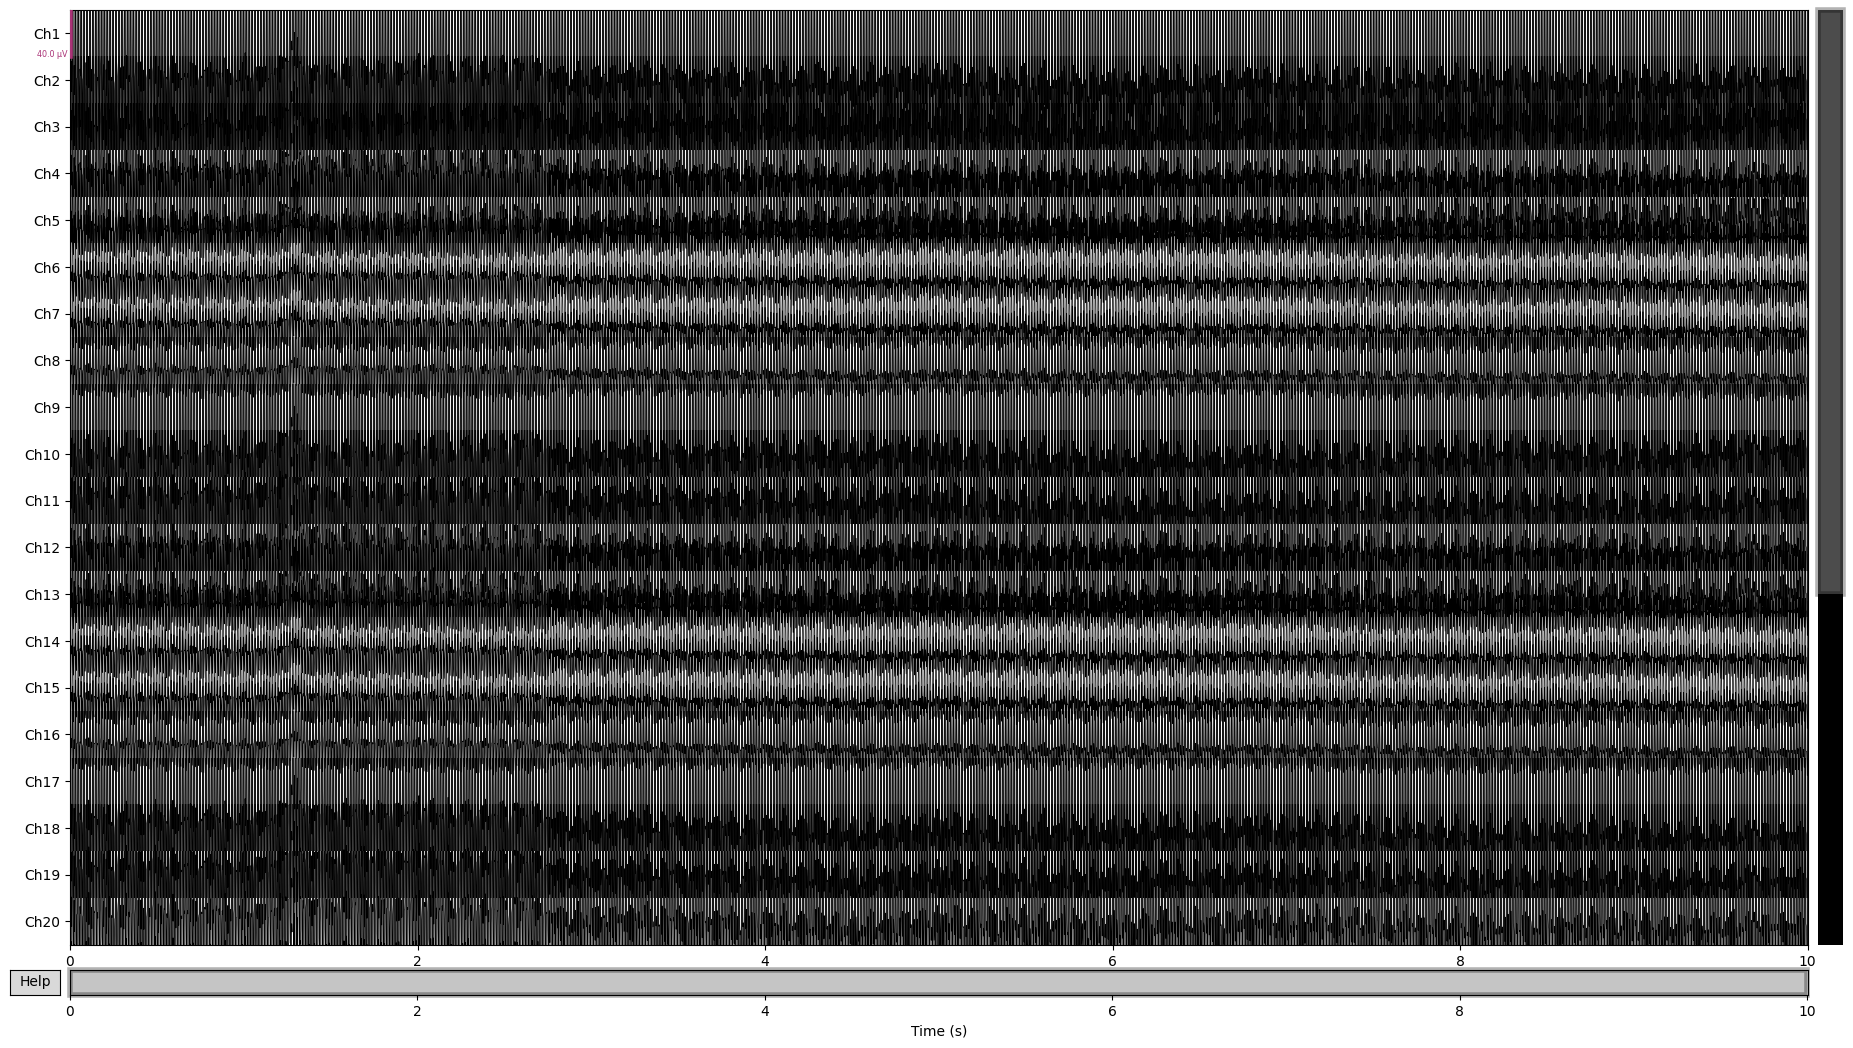

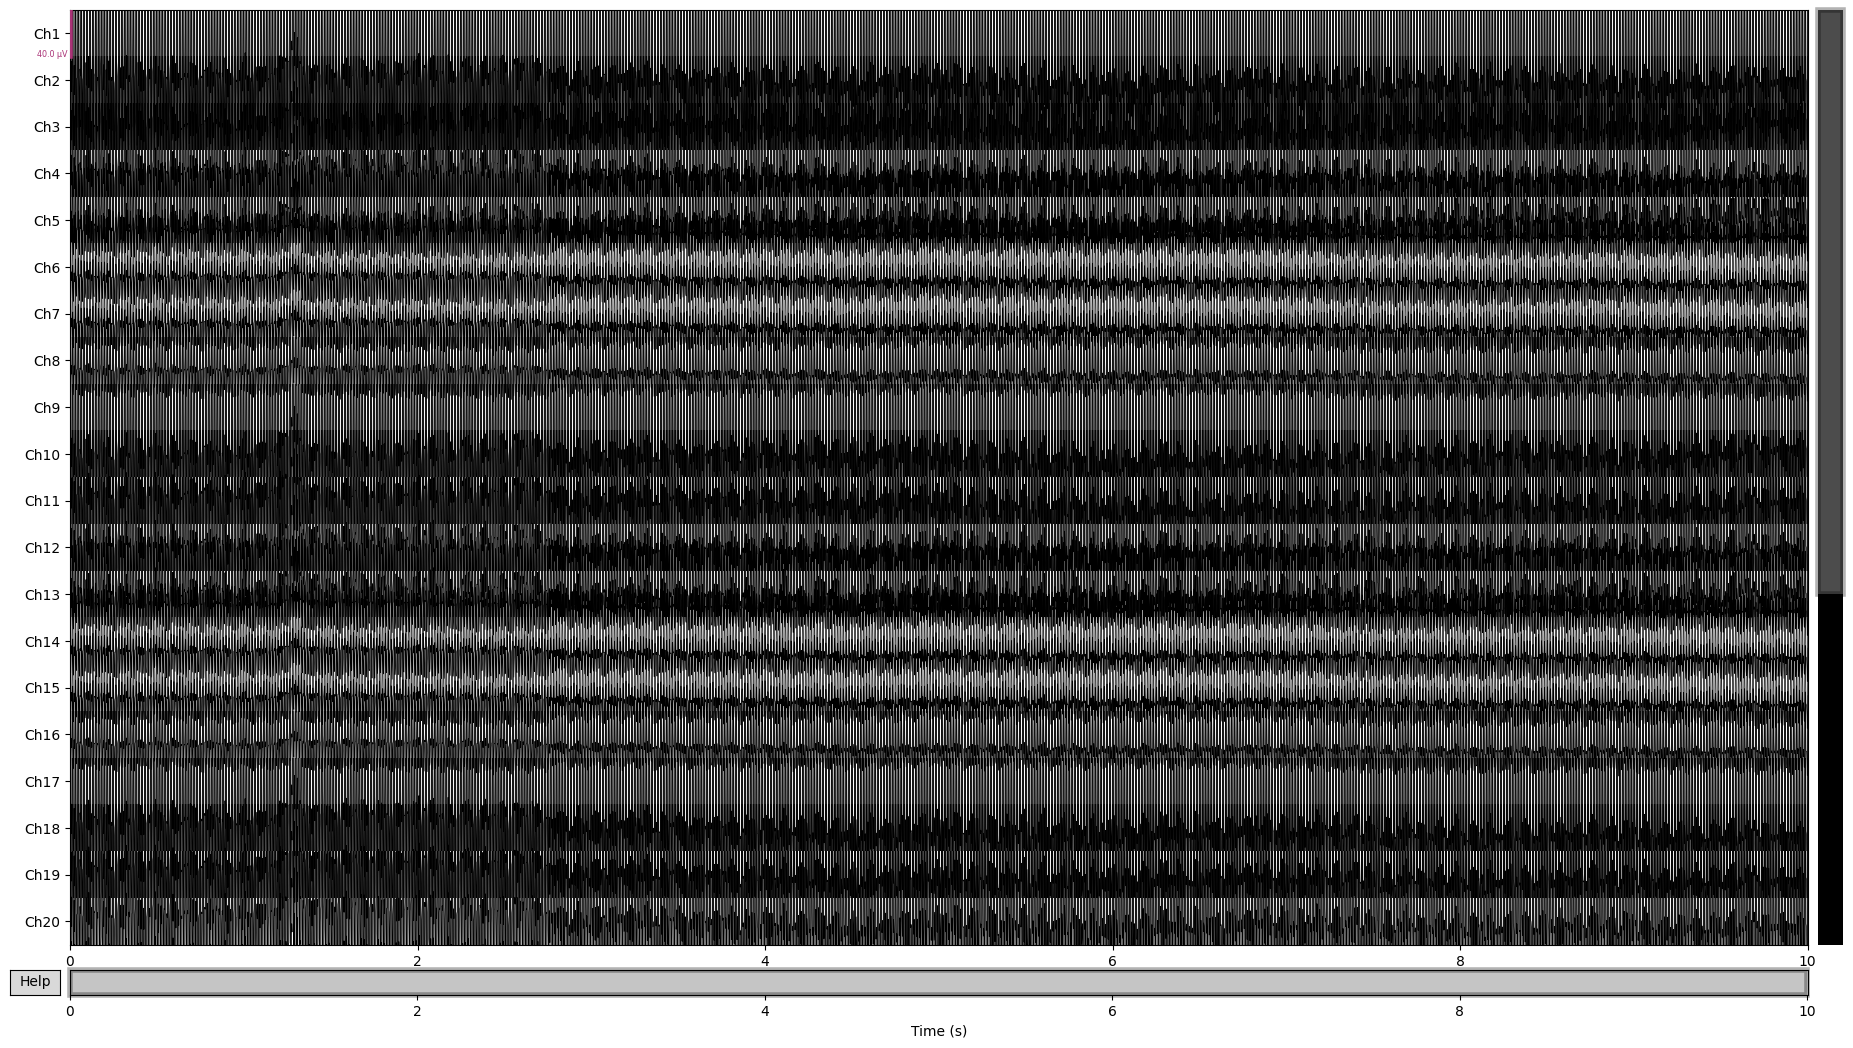

In [11]:
subject1_raw.plot()

## Save the imported data to .fif files


In [12]:
import tempfile
tmp_dir = tempfile.TemporaryDirectory()
saved_files = xdf.save_to_fif_files(tmp_dir.name)
print(f"Files: {saved_files}")



Writing /tmp/tmp0k1yas12/LSLOutletHS1-EEG_raw.fif
Closing /tmp/tmp0k1yas12/LSLOutletHS1-EEG_raw.fif
[done]
Writing /tmp/tmp0k1yas12/LSLOutletHS2-EEG_raw.fif
Closing /tmp/tmp0k1yas12/LSLOutletHS2-EEG_raw.fif
[done]
Files: ['/tmp/tmp0k1yas12/LSLOutletHS1-EEG_raw.fif', '/tmp/tmp0k1yas12/LSLOutletHS2-EEG_raw.fif']


## Montage

`XDFImport` does not set the montage automatically! Now that we have converted our stream(s) to `mne.Raw` object(s), we can fix that by setting the montage following [mne's general instruction for setting montage](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#about-montages-and-layouts). For example:

Setting 'standard_1020' as the montage for streams: LSLOutletHS1-EEG,LSLOutletHS2-EEG


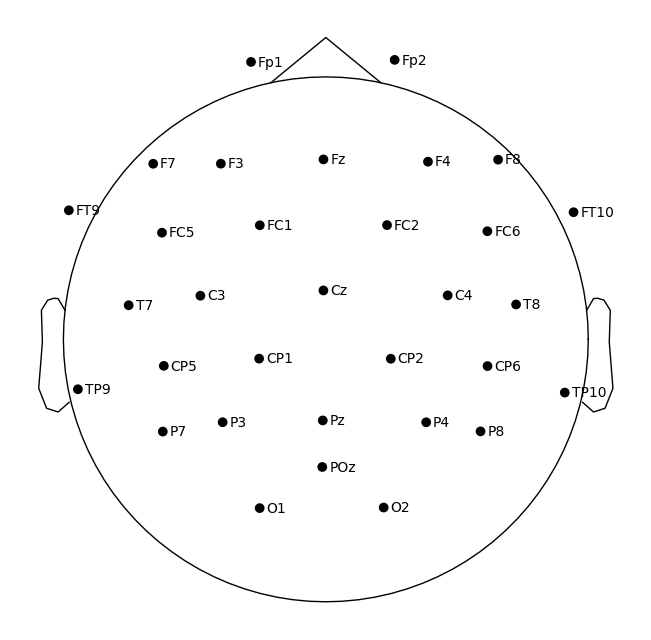

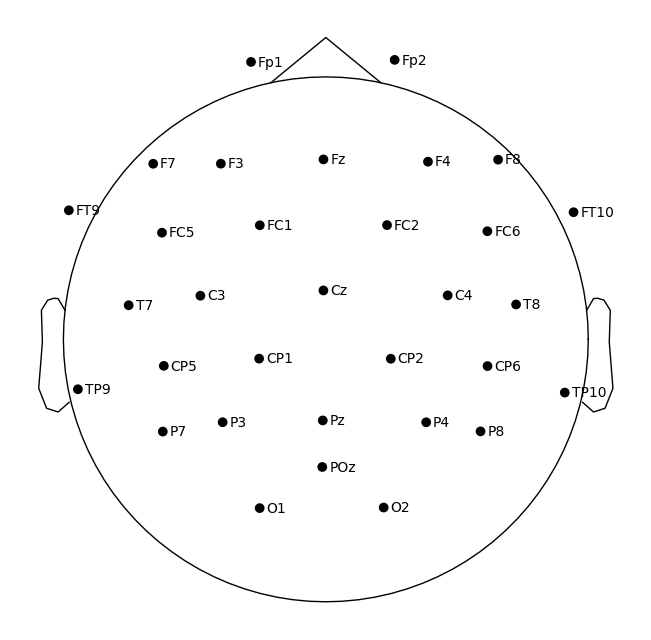

In [13]:
# Set the montage to the standard 10-20 montage
xdf.rename_channels(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'POz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'FT9', 'FT10', 'TP9', 'TP10'])
xdf.set_montage('standard_1020')

# Plot the sensors
xdf.mne_raws_dict['LSLOutletHS1-EEG'].plot_sensors(show_names=True)

### Using markers


Creating RawArray with float64 data, n_channels=3, n_times=6536
    Range : 0 ... 6535 =      0.000 ...     6.535 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=6538
    Range : 0 ... 6537 =      0.000 ...     6.537 secs
Ready.


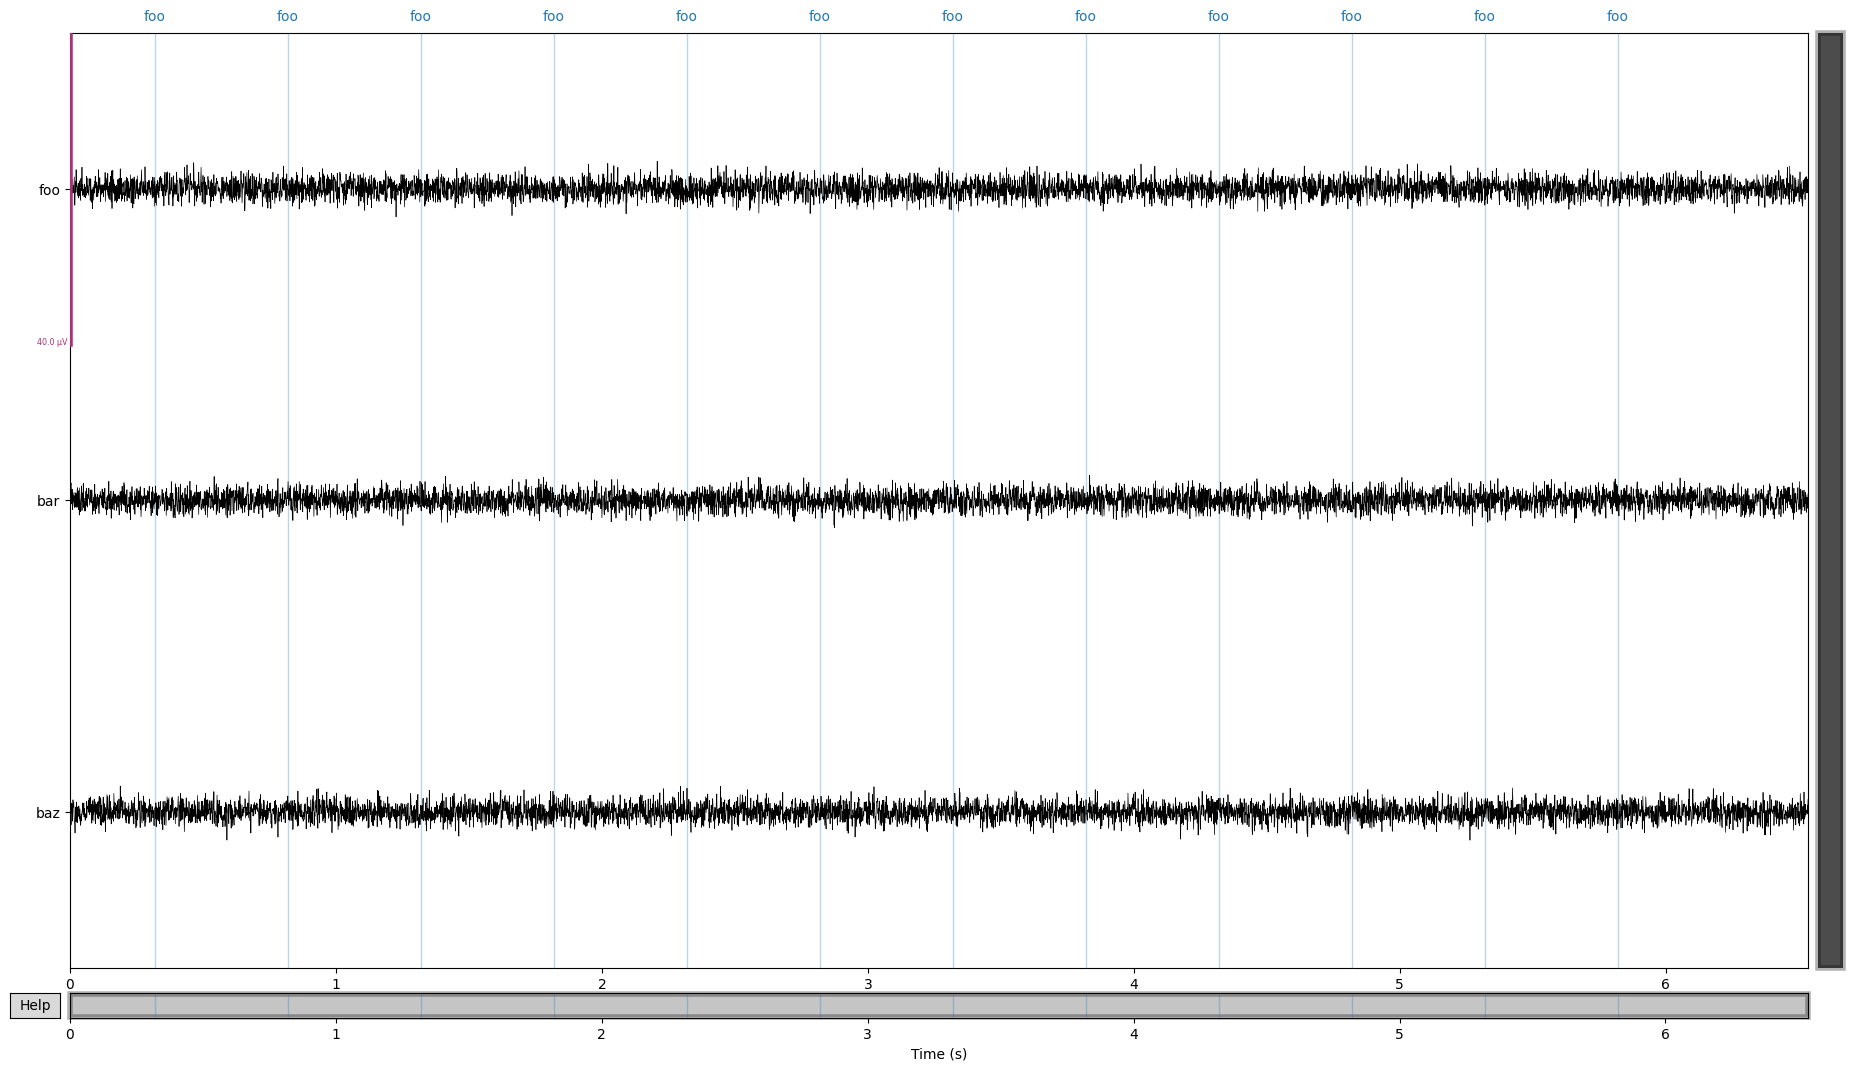

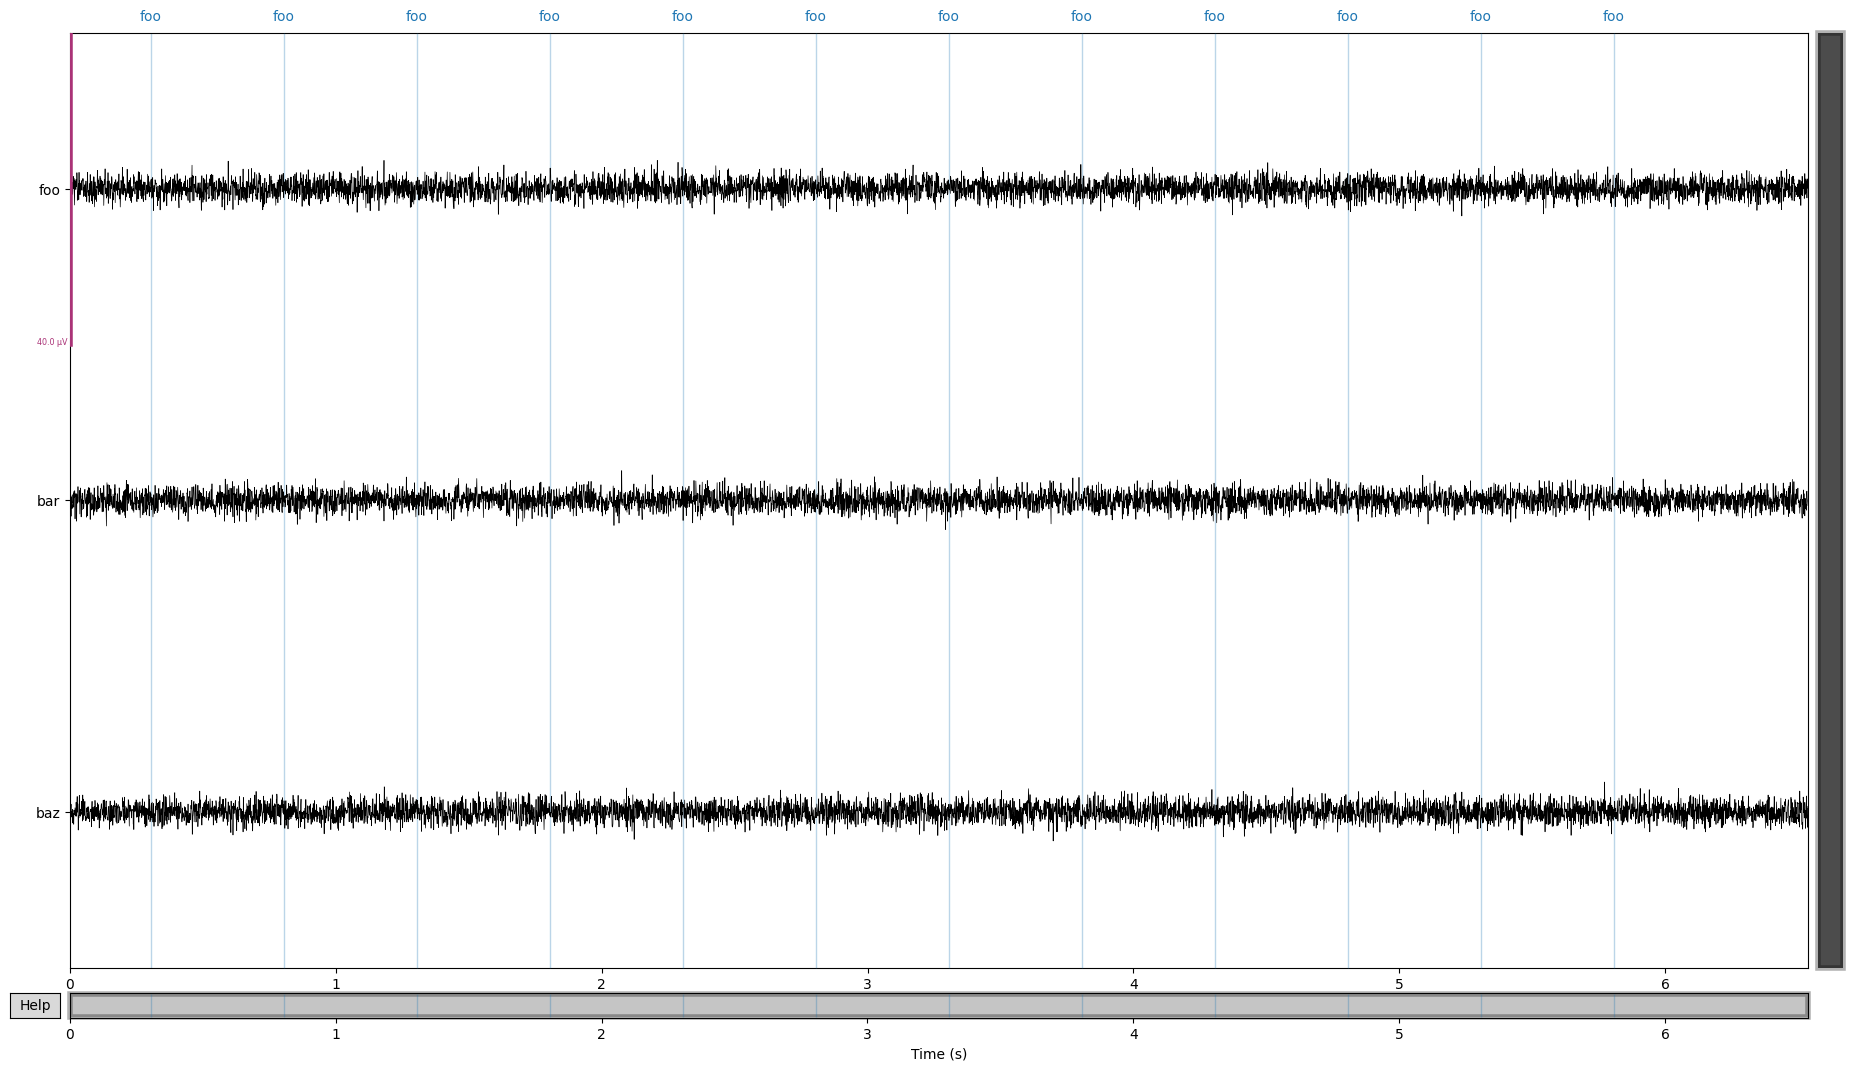

In [17]:
xdf = XDFImport(path_xdf_with_markers, scale=1e-6)

for raw in xdf.mne_raws:
    _ = raw.plot()


### Using sample XDF data from MNE


Creating RawArray with float64 data, n_channels=5, n_times=2320128
    Range : 0 ... 2320127 =      0.000 ...   232.013 secs
Ready.
XDFImport with 1 available streams and 1 selected streams (loaded from /home/patrice/mne_data/MNE-misc-data/xdf/sub-P001_ses-S004_task-Default_run-001_eeg_a2.xdf)
Available streams:
  Stream id 1 of type 'EEG' with name 'actiCHamp-16080699'
    Sampling Rate: 10000.0
    Channel names: [Left-,Left+,Right-,Right+,Markers]
    Channel types: [eeg,eeg,eeg,eeg,stim]
Selected streams: [actiCHamp-16080699]



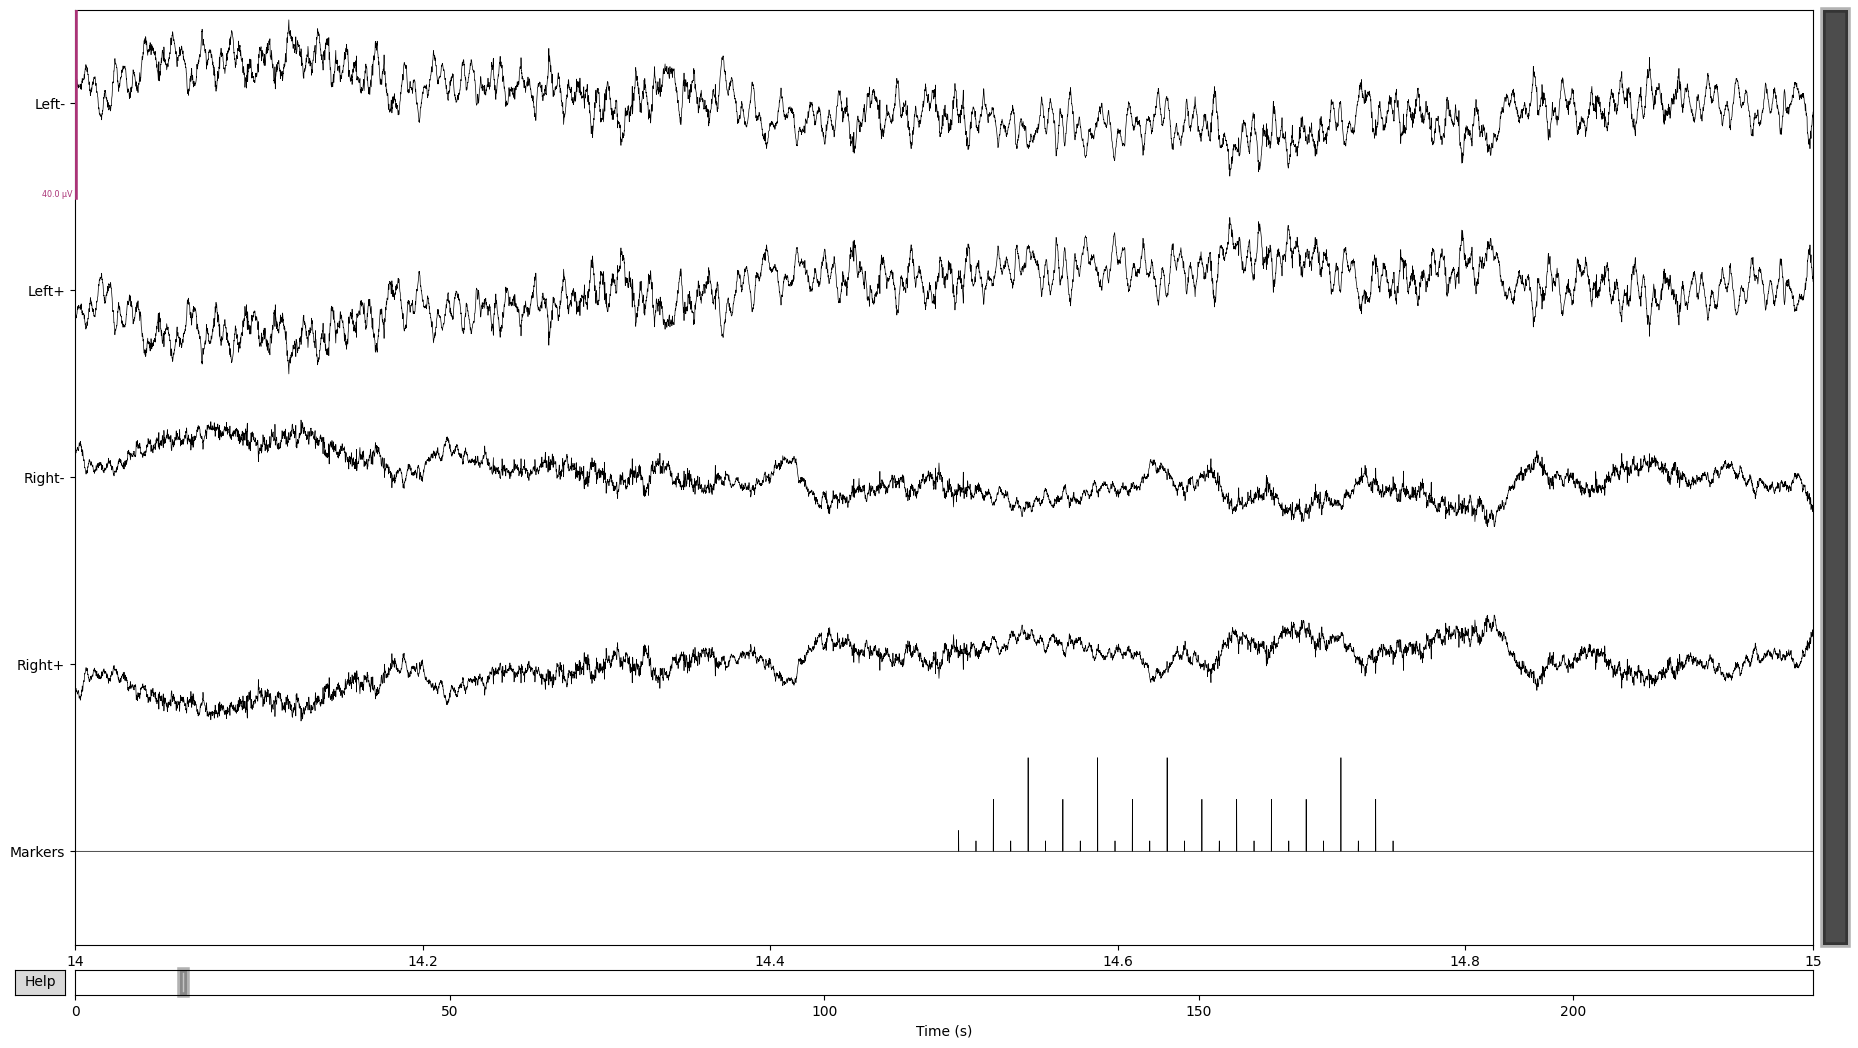

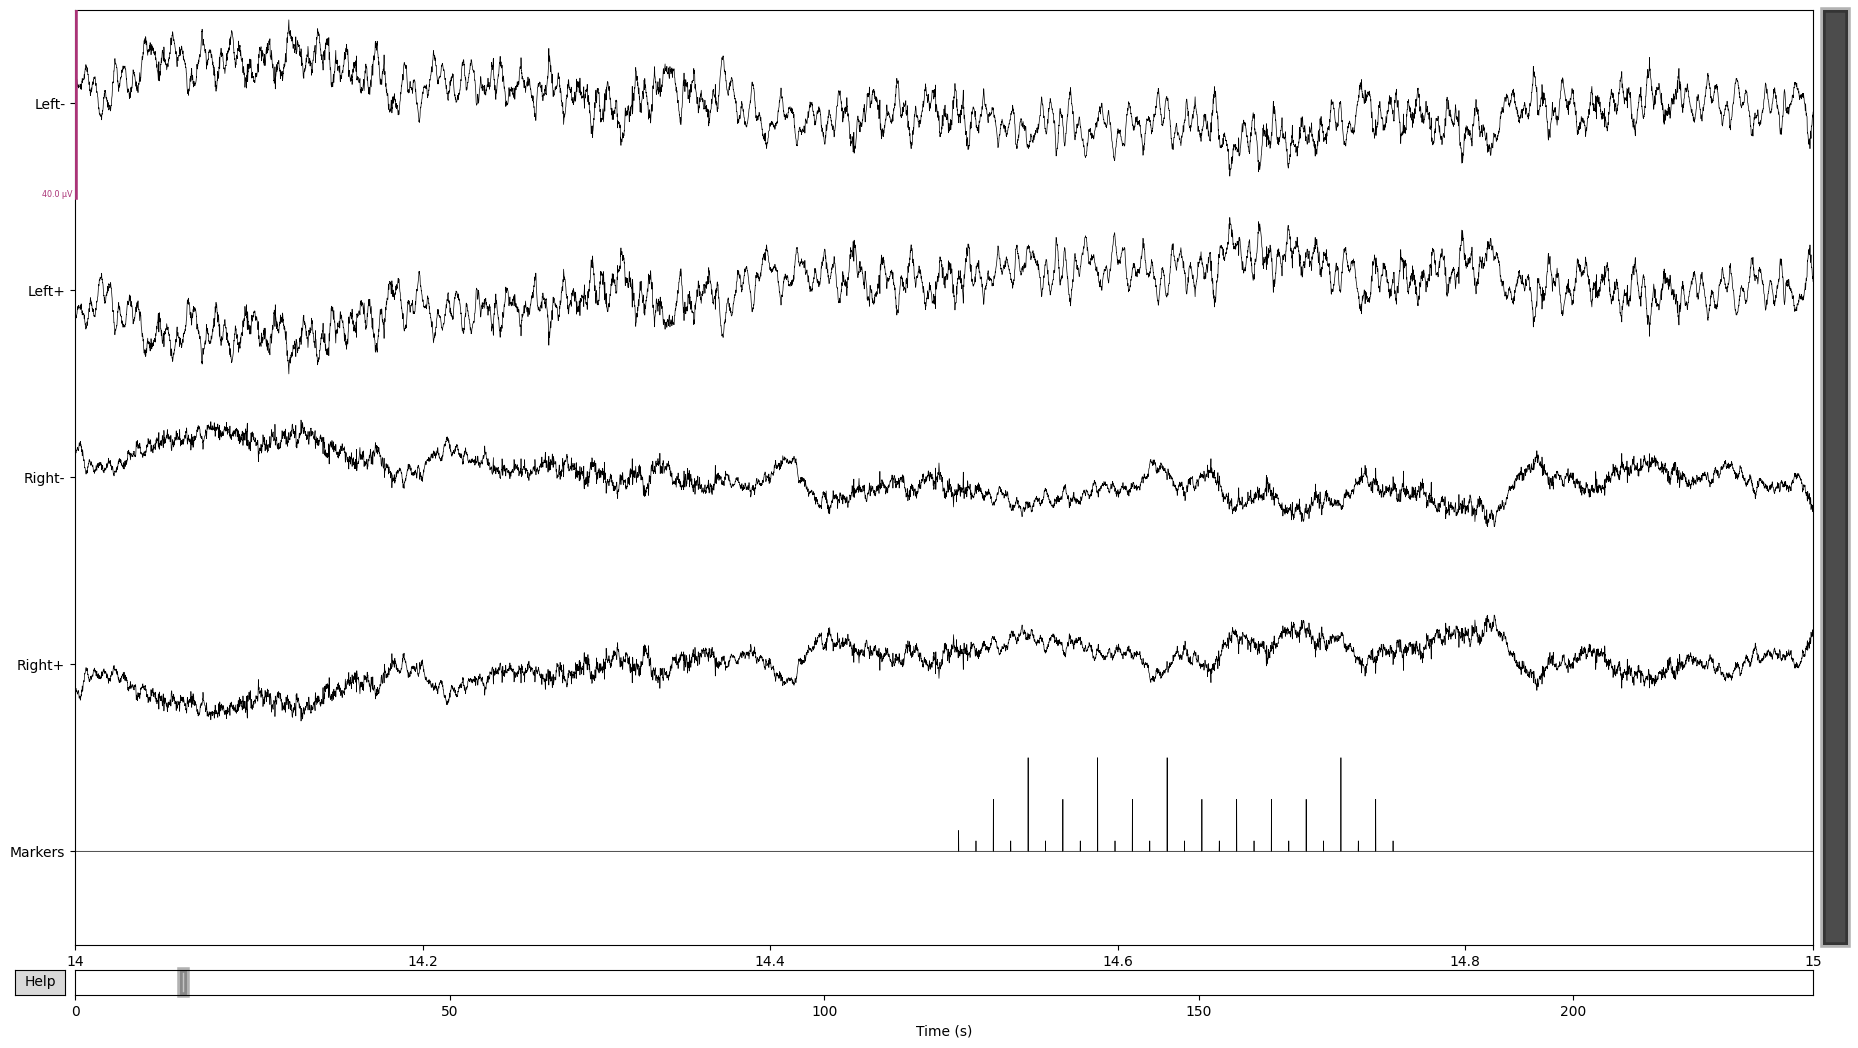

In [15]:
# See https://mne.tools/stable/auto_examples/io/read_xdf.html
from mne.datasets import misc

file_path = misc.data_path() / "xdf" / "sub-P001_ses-S004_task-Default_run-001_eeg_a2.xdf"

xdf_misc = XDFImport(file_path, scale=10e-9)

print(xdf_misc)

xdf_misc.mne_raws[0].plot(duration=1, start=14)